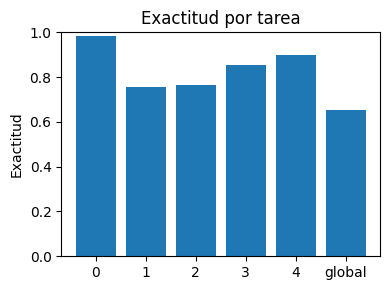

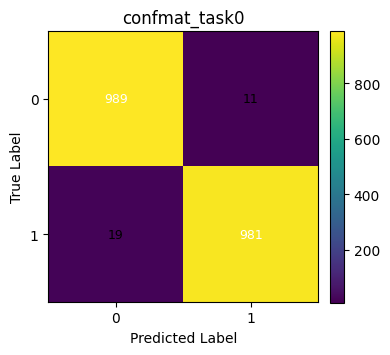

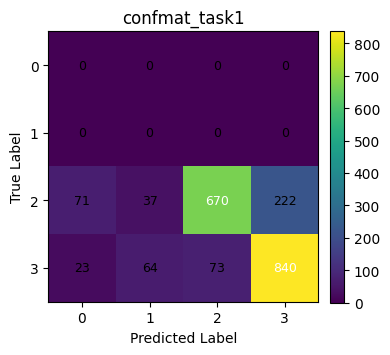

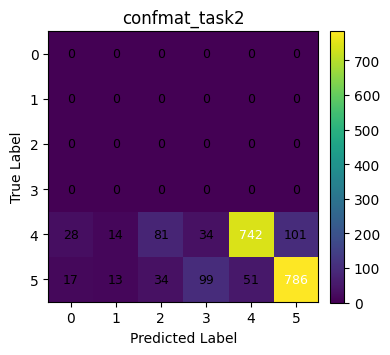

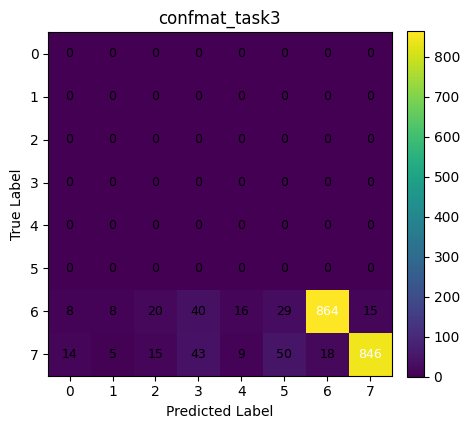

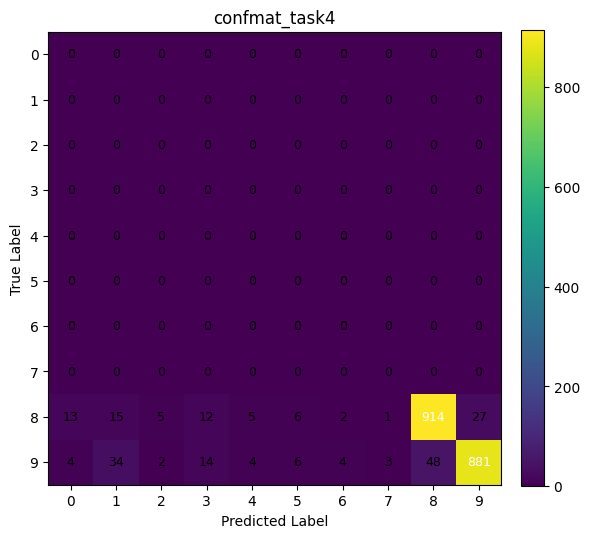

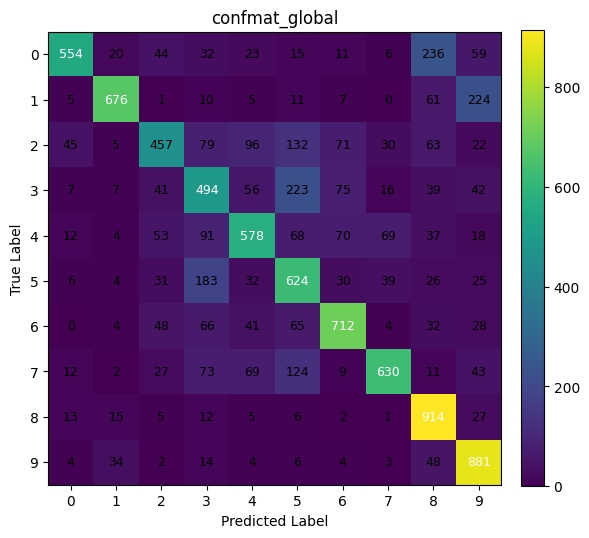

In [2]:
#!/usr/bin/env python3
# visualize_metrics.py  –  métricas + TODAS las matrices de confusión

import json, re
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# ─────────────────────────────── 1. Exactitud por tarea ───────────────────────────────
metrics = json.loads(Path("metrics.json").read_text())

def _task_key(t):
    """Ordena 0,1,2,… y deja 'global' al final."""
    return (str(t) == "global", int(t) if str(t).isdigit() else 999)

# Ordena tareas y extrae exactitudes
tasks_sorted = sorted(metrics, key=lambda m: _task_key(m["task"]))
tasks       = [str(m["task"]) for m in tasks_sorted]
accuracies  = [m["accuracy"]  for m in tasks_sorted]

fig_w = max(4, 0.6 * len(tasks))           # ancho adaptado al nº de barras
plt.figure(figsize=(fig_w, 3))
plt.bar(tasks, accuracies)
plt.ylim(0, 1)
plt.ylabel("Exactitud")
plt.title("Exactitud por tarea")
plt.tight_layout()


# ───────────────────── 2. Buscar y graficar TODAS las confusiones ─────────────────────
# → confmat_task0.csv, confmat_task1.csv, …, confmat_global.csv
def _conf_key(path: Path):
    """Ordenar task0, task1, … y 'global' al final."""
    m = re.search(r"task(\d+)", path.stem)
    return (m is None, int(m.group(1)) if m else 999)

conf_paths = sorted(Path(".").glob("confmat_*.csv"), key=_conf_key)

def plot_confmat(csv_file: Path):
    df = pd.read_csv(csv_file, header=0, index_col=0)
    cm = df.values
    labels = df.columns.astype(str)

    n = cm.shape[0]
    side = max(4, 0.6 * n)                 # cada clase ~0,6"  (ajusta a tu gusto)
    plt.figure(figsize=(side, side))
    im = plt.imshow(cm, interpolation="nearest")
    plt.title(csv_file.stem)               # ej. confmat_task3
    plt.colorbar(im, fraction=0.046, pad=0.04)

    ticks = np.arange(n)
    plt.xticks(ticks, labels)
    plt.yticks(ticks, labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

    # Anotar números
    thresh = cm.max() / 2
    for i in range(n):
        for j in range(n):
            v = cm[i, j]
            txt = f"{int(v)}" if v == int(v) else f"{v:.2f}"
            plt.text(j, i, txt,
                     ha="center", va="center",
                     color="white" if v > thresh else "black",
                     fontsize=9)
    plt.tight_layout()

for csv in conf_paths:
    plot_confmat(csv)

plt.show()
